# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

/home/ushnish/.local/lib/python3.7/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'


## H<sub>2</sub>

In [2]:
bond_lengths = np.linspace(0.2,2.6,15)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

E = 0.15748213365503272 Eh
E = -0.8488991062024303 Eh
E = -1.0882281844069168 Eh
E = -1.136928959400571 Eh
E = -1.1229570527982327 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.0154682491653277 Eh
E = -0.987392996293216 Eh
E = -0.9670259116093083 Eh
E = -0.9534242125062942 Eh
E = -0.9449089870950516 Eh
E = -0.9398197912188275 Eh
E = -0.9368706035283361 Eh
E = -0.9351960308386078 Eh


In [4]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

E = 0.16412595411335862 Eh
E = -0.8397057843499789 Eh
E = -1.074887931719117 Eh
E = -1.1175258568986912 Eh
E = -1.0951595815644795 Eh
E = -1.0495617842752072 Eh
E = -0.9960202460350677 Eh
E = -0.9415475409906814 Eh
E = -0.8899750208893146 Eh
E = -0.8432718025417755 Eh
E = -0.8022428650141384 Eh
E = -0.7669825247359998 Eh
E = -0.7371545448988288 Eh
E = -0.7121961606082431 Eh
E = -0.6914700512624794 Eh


In [5]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

E = 0.15748412056436217 Eh
E = -0.8488985094851161 Eh
E = -1.0882310174307857 Eh
E = -1.1369333351418656 Eh
E = -1.1229593878059763 Eh
E = -1.0887606905920533 Eh
E = -1.050426089327126 Eh
E = -1.015441636439638 Eh
E = -0.9873692257052735 Eh
E = -0.9670168314563374 Eh
E = -0.9534301294889956 Eh
E = -0.9449225613845066 Eh
E = -0.9398332746700124 Eh
E = -0.9368793989542732 Eh
E = -0.9351989265367034 Eh


In [6]:
#Run CISD
CISD_PES = obtain_PES('h2', bond_lengths, basis,  method='cisd')

E = 0.15748213365503183 Eh
E = -0.8488991062024303 Eh
E = -1.0882281844069168 Eh
E = -1.136928959400571 Eh
E = -1.1229570527982327 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.015468249165328 Eh
E = -0.9873929962932162 Eh
E = -0.9670259116093078 Eh
E = -0.9534242125062942 Eh
E = -0.9449089870950516 Eh
E = -0.9398197912188275 Eh
E = -0.9368706035283361 Eh
E = -0.9351960308386078 Eh


In [7]:
import pyscf
from pyscf import gto

def get_cisd_pes(molname, bond_lengths):
    
    CISD_PES = np.zeros(len(bond_lengths))
    for i in range(len(bond_lengths)):
        mol = gto.Mole()
        mol.atom = get_molecular_data(molname, bond_lengths[i], xyz_format=False)
        mol.basis = 'sto3g'
        mol.build()

        mf = mol.HF().run()
        mycc = mf.CISD().run()

        CISD_PES[i] = mycc.e_tot

    return CISD_PES

In [8]:
CISD_PES = get_cisd_pes('h2',bond_lengths)

converged SCF energy = 0.164175012061696
E(RCISD) = 0.1574821347983634  E_corr = -0.0066928772633324
converged SCF energy = -0.839684084028411
E(RCISD) = -0.8488991058276221  E_corr = -0.009215021799210823
converged SCF energy = -1.07486102487998
E(RCISD) = -1.088228184216443  E_corr = -0.01336715933646723
converged SCF energy = -1.11750157922795
E(RCISD) = -1.136928959387391  E_corr = -0.01942738015944256
converged SCF energy = -1.09513510118586
E(RCISD) = -1.1229570528643  E_corr = -0.02782195167843848
converged SCF energy = -1.04953250775748
E(RCISD) = -1.088764536597391  E_corr = -0.03923202883991331
converged SCF energy = -0.995976005043253
E(RCISD) = -1.050442037352026  E_corr = -0.05446603230877348
converged SCF energy = -0.941480654707798
E(RCISD) = -1.015468249288245  E_corr = -0.07398759458044676
converged SCF energy = -0.88988983743098
E(RCISD) = -0.9873929963938767  E_corr = -0.09750315896289638
converged SCF energy = -0.843174458580719
E(RCISD) = -0.9670259116938728  E_cor

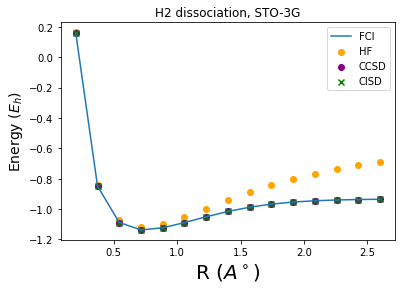

In [9]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green', marker='x')

plt.legend()

## H<sub>2</sub>O symmetric O-H dissociation

In [10]:
bond_lengths = np.linspace(0.5,2.7,15)

In [11]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

E = -73.14278405998414 Eh
E = -74.47523205268014 Eh
E = -74.90413378058017 Eh
E = -75.01383133956654 Eh
E = -75.00356512166928 Eh
E = -74.95170869126783 Eh
E = -74.89218648216018 Eh
E = -74.83923063661699 Eh
E = -74.79866365936574 Eh
E = -74.77161515186775 Eh
E = -74.75568947214684 Eh
E = -74.74704715251242 Eh
E = -74.74248898749448 Eh
E = -74.74007426712959 Eh
Could not converge


In [12]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

E = -73.12948161321476 Eh
E = -74.45343797011796 Eh
E = -74.87055361047916 Eh
E = -74.96308510923626 Eh
E = -74.92817508740148 Eh
E = -74.84281942863211 Eh
E = -74.74051950148022 Eh
E = -74.63577758413845 Eh
E = -74.53576638656821 Eh
E = -74.44494384742121 Eh
E = -74.36975504260424 Eh
E = -74.29778481417813 Eh
E = -74.2416722005104 Eh
E = -74.27129957698466 Eh
Could not converge


In [13]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

E = -73.14276363918694 Eh
E = -74.47519485717145 Eh
E = -74.90406353010552 Eh
E = -75.01370018934803 Eh
E = -75.00330155818898 Eh
E = -74.95116757042634 Eh
E = -74.89128367467829 Eh
E = -74.83853401139109 Eh
E = -74.80070162376026 Eh
E = -74.7810573871734 Eh
E = -74.74394274758566 Eh
E = -74.77972801511767 Eh
E = -74.7833896345312 Eh
E = -74.64224434262873 Eh
Could not converge


In [14]:
CISD_PES = get_cisd_pes('h2o',bond_lengths)

converged SCF energy = -73.129452389525
E(RCISD) = -73.14274671598835  E_corr = -0.01329432646338379
converged SCF energy = -74.4533755394551
E(RCISD) = -74.47513048268898  E_corr = -0.02175494323386633
converged SCF energy = -74.8704749148569
E(RCISD) = -74.90385790761569  E_corr = -0.03338299275878556
converged SCF energy = -74.9629980695849
E(RCISD) = -75.01306780040228  E_corr = -0.05006973081739186
converged SCF energy = -74.9280772606095
E(RCISD) = -75.00147251995746  E_corr = -0.07339525934792857
converged SCF energy = -74.8427106360412
E(RCISD) = -74.94643477106136  E_corr = -0.1037241350201756
converged SCF energy = -74.7404009823891
E(RCISD) = -74.88052836034143  E_corr = -0.1401273779522891
converged SCF energy = -74.635639705199
E(RCISD) = -74.81679144091009  E_corr = -0.1811517357110998
converged SCF energy = -74.5355993564465
E(RCISD) = -74.76098824931984  E_corr = -0.2253888928732998
converged SCF energy = -74.4447494378857
E(RCISD) = -74.71631450237024  E_corr = -0.2715

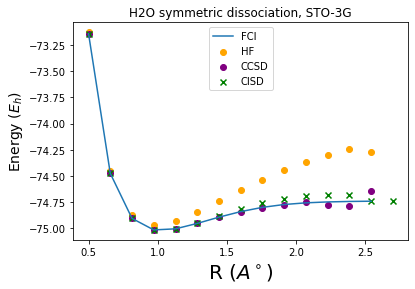

In [15]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green', marker='x')
plt.legend(loc = 'upper center')

Next we compute the PEs for other types of molecules
$LiH$, $N_2$, $H_4$, and $NH_3$

$LiH$

$r_0 = 1.619$ Angstrom

In [16]:
#Starting with LiH
#r_eqb = 1.619 Ang
bond_lengths = [x for x in np.linspace(1.0,1.619,7)] 
bond_lengths = bond_lengths[:-1]
bond_lengths += [x for x in np.linspace(1.619,2.7,8)]
print(bond_lengths)


[1.0, 1.1031666666666666, 1.2063333333333333, 1.3094999999999999, 1.4126666666666667, 1.5158333333333334, 1.619, 1.7734285714285714, 1.927857142857143, 2.0822857142857143, 2.2367142857142857, 2.3911428571428575, 2.545571428571429, 2.7]


In [17]:
#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')

E = -7.784460280267016 Eh
E = -7.826581033291663 Eh
E = -7.8537567405191755 Eh
E = -7.870306513162617 Eh
E = -7.879213083491041 Eh
E = -7.8825874467596675 Eh
E = -7.881966102172105 Eh
E = -7.875986257551343 Eh
E = -7.866316816191519 Eh
E = -7.854833029487001 Eh
E = -7.842840943542893 Eh
E = -7.831267952998646 Eh
E = -7.82076402134106 Eh
E = -7.8117353390570266 Eh


In [18]:
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')

E = -7.767438446509383 Eh
E = -7.809868898899703 Eh
E = -7.837007685195064 Eh
E = -7.853147591463726 Eh
E = -7.861262954015359 Eh
E = -7.863461398089033 Eh
E = -7.861274007382806 Eh
E = -7.852196870110709 Eh
E = -7.838473060448673 Eh
E = -7.821892548801976 Eh
E = -7.803657680000233 Eh
E = -7.7845941974472925 Eh
E = -7.765292431789765 Eh
E = -7.746198175823739 Eh


In [19]:
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

E = -7.784453781342631 Eh
E = -7.8265741793795796 Eh
E = -7.853749288769461 Eh
E = -7.87029812384524 Eh
E = -7.879203464182968 Eh
E = -7.882576382002868 Eh
E = -7.881953548276987 Eh
E = -7.875971515154593 Eh
E = -7.866299643294585 Eh
E = -7.854812625047344 Eh
E = -7.8428158815467865 Eh
E = -7.831236170665777 Eh
E = -7.820722983995104 Eh
E = -7.811682577240462 Eh


In [20]:
CISD_PES = get_cisd_pes('lih',bond_lengths)

converged SCF energy = -7.76736213574856
E(RCISD) = -7.784451852608679  E_corr = -0.01708971686011873
converged SCF energy = -7.80979176462687
E(RCISD) = -7.826572604171981  E_corr = -0.01678083954510814
converged SCF energy = -7.83692872385407
E(RCISD) = -7.853747789283751  E_corr = -0.01681906542968239
converged SCF energy = -7.85306658932546
E(RCISD) = -7.870296696278254  E_corr = -0.01723010695279547
converged SCF energy = -7.86118008465247
E(RCISD) = -7.879202170415573  E_corr = -0.01802208576309939
converged SCF energy = -7.86337692068671
E(RCISD) = -7.882575250021093  E_corr = -0.01919832933438552
converged SCF energy = -7.86118812320016
E(RCISD) = -7.881952418227405  E_corr = -0.02076429502724269
converged SCF energy = -7.8521087679479
E(RCISD) = -7.875969836904653  E_corr = -0.02386106895675052
converged SCF energy = -7.83838177201632
E(RCISD) = -7.866296783944054  E_corr = -0.02791501192773269
converged SCF energy = -7.8217968221343
E(RCISD) = -7.854808151441096  E_corr = -0.

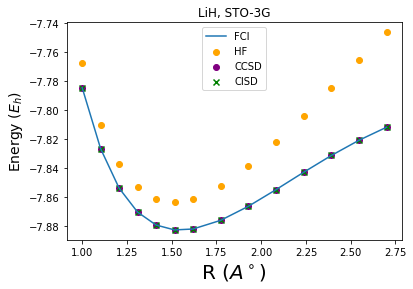

In [21]:
#Plot LiH PESs
plt.title('LiH, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green', marker='x')
plt.legend(loc = 'upper center')

$N_2$

$𝑟_0 = 1.119$ Angstrom

In [22]:
bond_lengths = [x for x in np.linspace(1.0,1.119,7)] 
bond_lengths += [x for x in np.linspace(1.120,1.5,8)]
print(bond_lengths)

[1.0, 1.0198333333333334, 1.0396666666666667, 1.0594999999999999, 1.0793333333333333, 1.0991666666666666, 1.119, 1.12, 1.1742857142857144, 1.2285714285714286, 1.282857142857143, 1.3371428571428572, 1.3914285714285715, 1.4457142857142857, 1.5]


In [23]:
#Run FCI
FCI_PES = obtain_PES('n2', bond_lengths, basis, method='fci')

E = -107.54930095845879 Eh
E = -107.57936182631799 Eh
E = -107.60426977104461 Eh
E = -107.62461218172389 Eh
E = -107.64091702383715 Eh
E = -107.65365858483037 Eh
E = -107.66326266176488 Eh
E = -107.66367090719594 Eh
E = -107.67654317719612 Eh
E = -107.67515353234205 Eh
E = -107.66422167662124 Eh
E = -107.64720402749526 Eh
E = -107.62662139218662 Eh
E = -107.60431377552207 Eh
E = -107.58163492166238 Eh


In [24]:
#Run HF
HF_PES = obtain_PES('n2', bond_lengths, basis,  method='hf')

E = -107.41977493311569 Eh
E = -107.44463337167241 Eh
E = -107.46417989839743 Eh
E = -107.47900078430978 Eh
E = -107.4896232948486 Eh
E = -107.49652138943975 Eh
E = -107.50012086456556 Eh
E = -107.50022209391761 Eh
E = -107.49581611315972 Eh
E = -107.47595793024246 Eh
E = -107.44538678204803 Eh
E = -107.40757624230037 Eh
E = -107.36505325903131 Eh
E = -107.31964558449492 Eh
E = -107.27267306962891 Eh


In [25]:
#Run CCSD
CCSD_PES = obtain_PES('n2', bond_lengths, basis,  method='ccsd')

E = -107.54672174051731 Eh
E = -107.57655853651973 Eh
E = -107.60122254002287 Eh
E = -107.62129976309477 Eh
E = -107.63731683263238 Eh
E = -107.64974677070184 Eh
E = -107.6590142217407 Eh
E = -107.65940481352958 Eh
E = -107.67121686790094 Eh
E = -107.66856287103089 Eh
E = -107.65617534281046 Eh
E = -107.63756041390978 Eh
E = -107.61534514771796 Eh
E = -107.59155926234763 Eh
E = -107.56786511076726 Eh


In [26]:
CISD_PES = get_cisd_pes('n2',bond_lengths)

converged SCF energy = -107.419532451682
E(RCISD) = -107.5413880040829  E_corr = -0.1218555524007892
converged SCF energy = -107.444392019977
E(RCISD) = -107.5706873719468  E_corr = -0.1262953519698549
converged SCF energy = -107.463939801353
E(RCISD) = -107.5947691428806  E_corr = -0.1308293415272086
converged SCF energy = -107.478762050245
E(RCISD) = -107.6142167538109  E_corr = -0.1354547035664164
converged SCF energy = -107.489386014881
E(RCISD) = -107.6295542327165  E_corr = -0.1401682178355297
converged SCF energy = -107.496285635953
E(RCISD) = -107.6412519740826  E_corr = -0.1449663381297301
converged SCF energy = -107.499886689299
E(RCISD) = -107.6497319564189  E_corr = -0.1498452671197215
converged SCF energy = -107.499987999199
E(RCISD) = -107.6500813312711  E_corr = -0.1500933320716435
converged SCF energy = -107.495586402918
E(RCISD) = -107.6594244950633  E_corr = -0.1638380921456051
converged SCF energy = -107.475732233166
E(RCISD) = -107.6538055243094  E_corr = -0.1780732

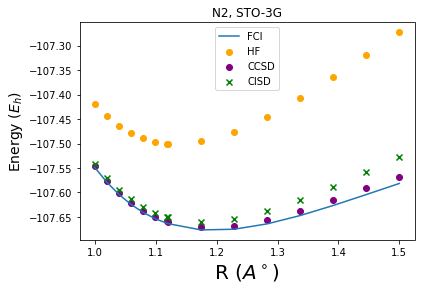

In [27]:
#Plot N2 PESs

plt.title('N2, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green', marker='x')
plt.legend(loc = 'upper center')

$H_4$

In [28]:
bond_angles = np.linspace(15.0,40.0,15)

In [29]:
#Run FCI
FCI_PES = obtain_PES('h4', bond_angles, basis, method='fci')

E = -2.0068718592934176 Eh
E = -2.1234259297348146 Eh
E = -2.1975716025574656 Eh
E = -2.242083531611136 Eh
E = -2.2656066463508235 Eh
E = -2.274203693316803 Eh
E = -2.272212868759293 Eh
E = -2.2627613949727357 Eh
E = -2.248106803853901 Eh
E = -2.2298840845547856 Eh
E = -2.2092905342264375 Eh
E = -2.1872214193008004 Eh
E = -2.164364655899896 Eh
E = -2.14126280433558 Eh
E = -2.118351157198698 Eh


In [30]:
#Run HF
HF_PES = obtain_PES('h4', bond_angles, basis,  method='hf')

E = -1.9849347692648487 Eh
E = -2.098748534692808 Eh
E = -2.1697996453787862 Eh
E = -2.21084632807087 Eh
E = -2.2305166112277677 Eh
E = -2.234854064172708 Eh
E = -2.2281736520492728 Eh
E = -2.2135741130823856 Eh
E = -2.1932791675608745 Eh
E = -2.1688858891868468 Eh
E = -2.1415518261596196 Eh
E = -2.1121334945068337 Eh
E = -2.0812839742401517 Eh
E = -2.049517580947495 Eh
E = -2.017250242934632 Eh


In [31]:
#Run CCSD
CCSD_PES = obtain_PES('h4', bond_angles, basis,  method='ccsd')

E = -2.006874032480604 Eh
E = -2.123430278000006 Eh
E = -2.1975778905488093 Eh
E = -2.2420913057151335 Eh
E = -2.265615239099499 Eh
E = -2.2742123494989763 Eh
E = -2.27222086380541 Eh
E = -2.2627680555622964 Eh
E = -2.2481114775472464 Eh
E = -2.2298860668793705 Eh
E = -2.209288931672764 Eh
E = -2.18721518888269 Eh
E = -2.1643525553289034 Eh
E = -2.141243600128539 Eh
E = -2.1183238906202075 Eh


In [32]:
CISD_PES = get_cisd_pes('h4',bond_angles)

converged SCF energy = -1.98488287101752
E(RCISD) = -2.006777575028098  E_corr = -0.02189470401057808
converged SCF energy = -2.09869359316515
E(RCISD) = -2.123295978229399  E_corr = -0.02460238506424899
converged SCF energy = -2.16974452442685
E(RCISD) = -2.197392639407384  E_corr = -0.02764811498053792
converged SCF energy = -2.21079297347614
E(RCISD) = -2.241837914860919  E_corr = -0.03104494138478031
converged SCF energy = -2.23046557734118
E(RCISD) = -2.265271339575867  E_corr = -0.03480576223468902
converged SCF energy = -2.2348048631729
E(RCISD) = -2.273748951553912  E_corr = -0.03894408838101146
converged SCF energy = -2.22812531339138
E(RCISD) = -2.27160063473813  E_corr = -0.04347532134675272
converged SCF energy = -2.2135256364706
E(RCISD) = -2.261943325425843  E_corr = -0.04841768895524375
converged SCF energy = -2.19322972324312
E(RCISD) = -2.2470218674471  E_corr = -0.05379214420397686
converged SCF energy = -2.16883474959223
E(RCISD) = -2.228455729317492  E_corr = -0.059

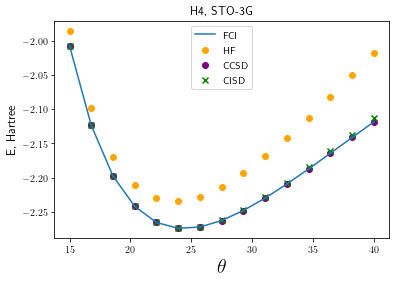

In [33]:
#Plot H4 PESs
import matplotlib
matplotlib.rcParams['text.usetex'] = True

plt.title('H4, STO-3G')
plt.xlabel(r'$\theta$',fontsize=20)
plt.ylabel('E, Hartree',fontsize=12)

plt.plot(bond_angles, FCI_PES, label='FCI')
plt.scatter(bond_angles, HF_PES, label='HF', color='orange')
plt.scatter(bond_angles, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_angles, CISD_PES, label='CISD', color='green', marker='x')
plt.legend(loc = 'upper center')

$NH_3$

$r_0 = 1.008$

In [34]:
bond_lengths = [x for x in np.linspace(0.9,1.008,7)] 
bond_lengths += [x for x in np.linspace(1.009,1.25,8)]
print(bond_lengths)

[0.9, 0.918, 0.936, 0.954, 0.972, 0.99, 1.008, 1.009, 1.0434285714285714, 1.0778571428571428, 1.112285714285714, 1.1467142857142856, 1.181142857142857, 1.2155714285714285, 1.25]


In [35]:
#Run FCI
FCI_PES = obtain_PES('nh3', bond_lengths, basis, method='fci')

E = -55.44295420442623 Eh
E = -55.46298296219344 Eh
E = -55.47957405693691 Eh
E = -55.493067179895085 Eh
E = -55.50376823961447 Eh
E = -55.51195328410008 Eh
E = -55.51787196629144 Eh
E = -55.5181389792432 Eh
E = -55.523756170018245 Eh
E = -55.52331346494561 Eh
E = -55.5179666151053 Eh
E = -55.50869345580364 Eh
E = -55.4963260828184 Eh
E = -55.481574926041084 Eh
E = -55.46504680655901 Eh


In [36]:
#Run HF
HF_PES = obtain_PES('nh3', bond_lengths, basis,  method='hf')

E = -55.39249807108406 Eh
E = -55.410445500564066 Eh
E = -55.42487484980342 Eh
E = -55.436121887188996 Eh
E = -55.44448843673746 Eh
E = -55.450246304789914 Eh
E = -55.45364075061956 Eh
E = -55.45376459180826 Eh
E = -55.45425541943948 Eh
E = -55.448280411016384 Eh
E = -55.43696050777133 Eh
E = -55.42123747744193 Eh
E = -55.401906629666726 Eh
E = -55.37964166869845 Eh
E = -55.355013791189336 Eh


In [37]:
#Run CCSD
CCSD_PES = obtain_PES('nh3', bond_lengths, basis,  method='ccsd')

E = -55.44283640528912 Eh
E = -55.46285377587851 Eh
E = -55.47943203022054 Eh
E = -55.49291069341917 Eh
E = -55.50359549688198 Eh
E = -55.51176230197188 Eh
E = -55.51766056675843 Eh
E = -55.51792637753223 Eh
E = -55.52349744072815 Eh
E = -55.522998431907595 Eh
E = -55.51758367662271 Eh
E = -55.508229709129175 Eh
E = -55.49576753616493 Eh
E = -55.48090679726958 Eh
E = -55.46425396821065 Eh


In [38]:
CISD_PES = get_cisd_pes('nh3',bond_lengths)

converged SCF energy = -55.3923579267129
E(RCISD) = -55.44212365438822  E_corr = -0.04976572767535896
converged SCF energy = -55.4103046515725
E(RCISD) = -55.46206039811116  E_corr = -0.05175574653863577
converged SCF energy = -55.4247334317111
E(RCISD) = -55.47854932619662  E_corr = -0.05381589448547693
converged SCF energy = -55.4359800143866
E(RCISD) = -55.49192900630738  E_corr = -0.05594899192081332
converged SCF energy = -55.4443461985254
E(RCISD) = -55.50250410158405  E_corr = -0.05815790305870151
converged SCF energy = -55.4501037627538
E(RCISD) = -55.51054928248406  E_corr = -0.06044551973026486
converged SCF energy = -55.4534979374959
E(RCISD) = -55.51631267967978  E_corr = -0.06281474218390842
converged SCF energy = -55.4536217639893
E(RCISD) = -55.51657058055795  E_corr = -0.06294881656860124
converged SCF energy = -55.4541120603316
E(RCISD) = -55.52183954716882  E_corr = -0.06772748683719698
converged SCF energy = -55.448136363766
E(RCISD) = -55.52097194074496  E_corr = -0

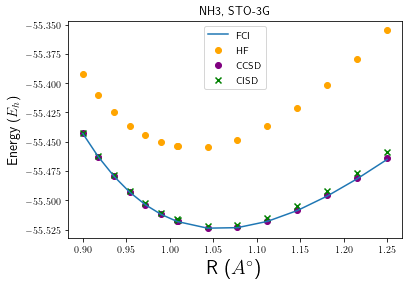

In [39]:
#Plot NH3 PESs
import matplotlib
matplotlib.rcParams['text.usetex'] = True

plt.title('NH3, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green', marker='x')
plt.legend(loc = 'upper center')

# Checking Size Consistency

In [40]:
r0 = 0.741
hf_PES = obtain_PES('h2', [r0], basis, method='hf')
cisd_PES = obtain_PES('h2', [r0], basis, method='cisd')
cisd_PES = get_cisd_pes('h2',[r0])
ccsd_PES = obtain_PES('h2', [r0], basis, method='ccsd')

hf_PES2 = obtain_PES('h2x2', [100], basis, method='hf')
cisd_PES2 = get_cisd_pes('h2x2',[r0])
ccsd_PES2 = obtain_PES('h2x2', [100], basis, method='ccsd')

E = -1.1167301396271105 Eh
E = -1.1372744055258717 Eh
converged SCF energy = -1.11670613723611
E(RCISD) = -1.13727440552944  E_corr = -0.02056826829333391
E = -1.137278690137717 Eh
E = -2.233460395507259 Eh
converged SCF energy = -2.09846837171682
E(RCISD) = -2.13925245266723  E_corr = -0.04078408095040723
E = -2.274557379570819 Eh


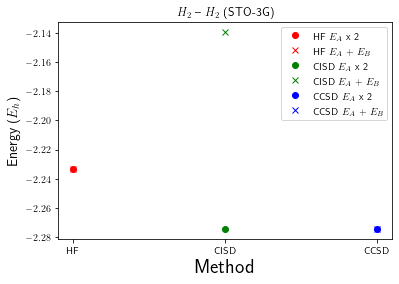

In [41]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True

plt.title(r'$H_2$ -- $H_2$ (STO-3G)')
plt.xlabel(r'Method',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot([1], hf_PES*2, 'ro', label=r'HF $E_A$ x 2')
plt.plot([1], hf_PES2, 'rx', label=r'HF $E_A$ + $E_B$')

plt.plot([2], cisd_PES*2, 'go', label=r'CISD $E_A$ x 2')
plt.plot([2], cisd_PES2, 'gx', label=r'CISD $E_A$ + $E_B$')

plt.plot([3], ccsd_PES*2, 'bo', label=r'CCSD $E_A$ x 2')
plt.plot([3], ccsd_PES2, 'bx', label=r'CCSD $E_A$ + $E_B$')

plt.xticks([1, 2, 3], ['HF', 'CISD', 'CCSD'])
plt.legend(loc = 'upper right')

# Exploring electron correlation and basis dependence

In [42]:
import pyscf
from pyscf import gto
from pyscf import cc
    
methods = ['hf','cisd','ccsd','ccsd(t)','ccsdt']
basis = ['sto3g','ccpvdz','ccpvtz','ccpvqz','ccpv5z']
energies = np.zeros([5,5])      
         
for i in range(len(basis)):
#for i in range(1):
    mol = gto.Mole()
    mol.atom = get_molecular_data('h2', 0.741, xyz_format=False)
    mol.basis = basis[i]
    mol.build()
    
    print('\nBasis: ',basis[i])
    mf = mol.HF().run()
    energies[0,i] = mf.e_tot
    
    mycc = mf.CISD().run()
    energies[1,i] = mycc.e_tot
    
    ccsd_h2 = cc.CCSD(mf)
    rv = ccsd_h2.kernel()    
    energies[2,i] = rv[0] + energies[0,i]
    energies[3,i] = energies[2,i] + ccsd_h2.ccsd_t()
       
    


Basis:  sto3g
converged SCF energy = -1.11670613723611
E(RCISD) = -1.13727440552944  E_corr = -0.02056826829333391
E(CCSD) = -1.137274570976645  E_corr = -0.02056843374053884
CCSD(T) correction = -1.65863679163582e-49

Basis:  ccpvdz
converged SCF energy = -1.12871101091532
E(RCISD) = -1.163402961063555  E_corr = -0.03469195014823098
E(CCSD) = -1.163402967174229  E_corr = -0.03469195625890495
CCSD(T) correction = -2.8921889445374e-19

Basis:  ccpvtz
converged SCF energy = -1.13295913881568
E(RCISD) = -1.172334937115359  E_corr = -0.03937579829967849
E(CCSD) = -1.172334901959212  E_corr = -0.03937576314353191
CCSD(T) correction = -1.69474065745396e-21

Basis:  ccpvqz
converged SCF energy = -1.1334575087222
E(RCISD) = -1.173795980839231  E_corr = -0.04033847211702894
E(CCSD) = -1.173795979406602  E_corr = -0.04033847068439982
CCSD(T) correction = 8.38048955777212e-21

Basis:  ccpv5z
converged SCF energy = -1.13360662616691
E(RCISD) = -1.174222792990675  E_corr = -0.04061616682376275
E(C

In [43]:
energies

array([[-1.11670614, -1.12871101, -1.13295914, -1.13345751, -1.13360663],
       [-1.13727441, -1.16340296, -1.17233494, -1.17379598, -1.17422279],
       [-1.13727457, -1.16340297, -1.1723349 , -1.17379598, -1.17422279],
       [-1.13727457, -1.16340297, -1.1723349 , -1.17379598, -1.17422279],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

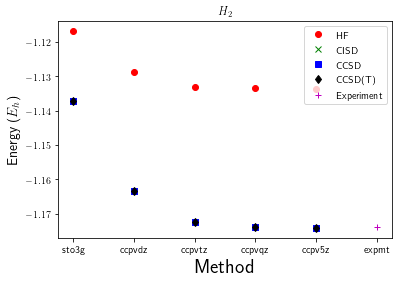

In [44]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True


plt.title(r'$H_2$')
plt.xlabel(r'Method',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

xvals = [1,2,3,4,5]
plt.plot(xvals, energies[0], 'ro', label='HF')
plt.plot(xvals, energies[1], 'gx', label='CISD')
plt.plot(xvals, energies[2], 'bs', label='CCSD')
plt.plot(xvals, energies[3], 'kd', label='CCSD(T)')

#Experimental data
#at r_0 = 0.741 A bindign energy is 4.74 eV
E_exp = (-13.6*2 - 4.74)*0.0367493
plt.plot(6, E_exp, 'm+', label='Experiment')
plt.xticks(xvals + [6], basis + ['expmt'])

plt.legend(loc = 'upper right')

In [45]:
-1.17422279 - E_exp

-0.0004501480000000946

In [46]:
E_exp

-1.1737726419999999